# CAR PRICE PREDITION-EDA

In [8]:
#import important libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
path=("/content/drive/MyDrive/Colab Notebooks/cars.csv")

In [11]:
#Read Data
df=pd.read_csv(path)

In [12]:
#first 5 Rows
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [13]:
#Rows and Columns
df.shape

(205, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [15]:
#Dataset cotains 205 Rows and 15 columns

In [16]:
num_col=df.select_dtypes(include=['int','float']).columns
num_col

Index(['symboling', 'width', 'height', 'engine-size', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [17]:
len(num_col)

7

In [18]:
cat_col=df.select_dtypes(include=['object']).columns
cat_col

Index(['normalized-losses', 'make', 'fuel-type', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'horsepower'],
      dtype='object')

In [19]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [20]:
#The values in symboling column is between -2 to 3.
#The Avg Symobling value is 0.83 
#the median symboling is 1.00

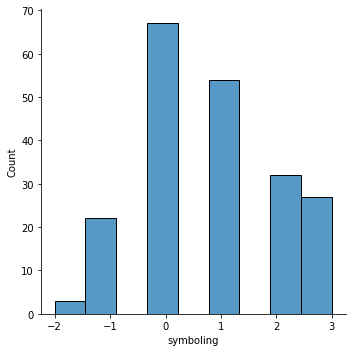

In [21]:
sns.displot(df['symboling'])

In [22]:
#The values in width is between 62 to 72
# THe mean(65.90) and median(65.50) width is almost same,so we can say that width is normally distributed.

In [23]:
#The values in height is between 47 to 59.80

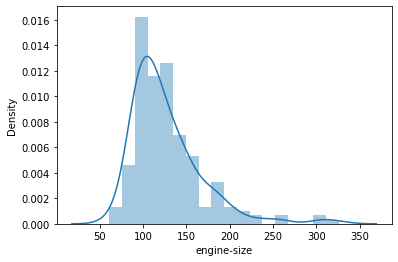

In [24]:
sns.distplot(df['engine-size'])

In [25]:
#The values in engine-size is between 60.00 to 326
#engine size is slightly right skewed.
#Average ngine size is 126.90

In [26]:
##The values in city is between 13.00 to 49.00
#Average city mpg is 25.21
#Median city mpg is 24

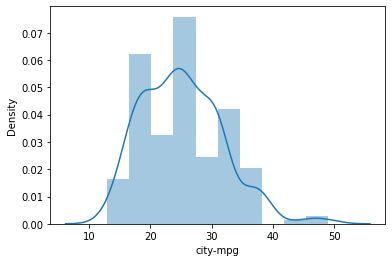

In [27]:
sns.distplot(df['city-mpg'])

In [28]:
##The values in highway-mpg is between 16.00 to 54.00
#Average city mpg is 30.75
#Median city mpg is 30

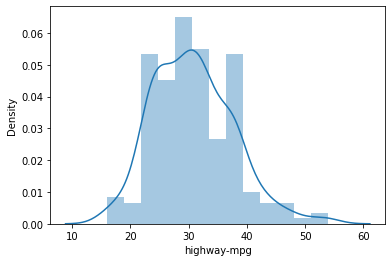

In [29]:
sns.distplot(df['highway-mpg'])

In [30]:
##The values in highway-mpg is between 5118 to 45400
#Average city mpg is 13227
#Median city mpg is 10345

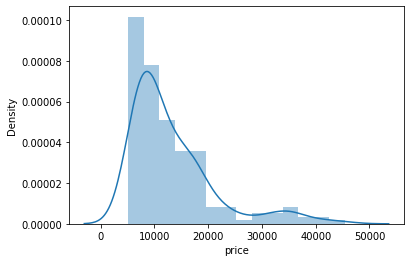

In [31]:
sns.distplot(df['price'])

# Handling Outliers

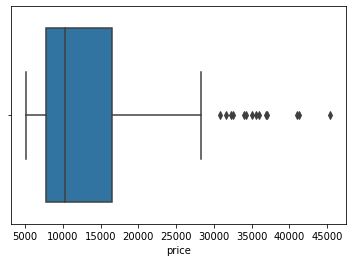

In [32]:
sns.boxplot(df['price'])

In [33]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [34]:
df.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

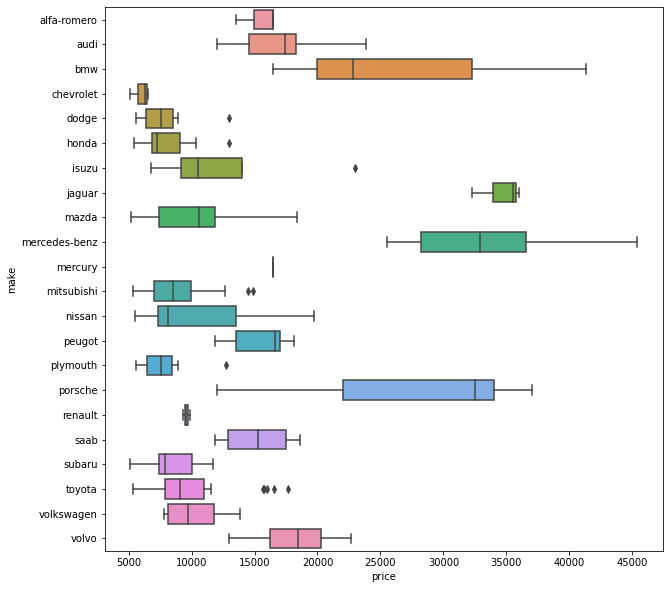

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(x="price",y='make',data=df)
plt.show()

In [36]:
df.loc[(df['make']=="toyota") & (df['price']>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116,24,30,17669
178,3,197,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161,20,24,16558
179,3,197,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161,19,24,15998
180,-1,90,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156,20,24,15690
181,-1,?,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156,19,24,15750


In [37]:
df.drop(index=[172,178,179,180,181],inplace=True)

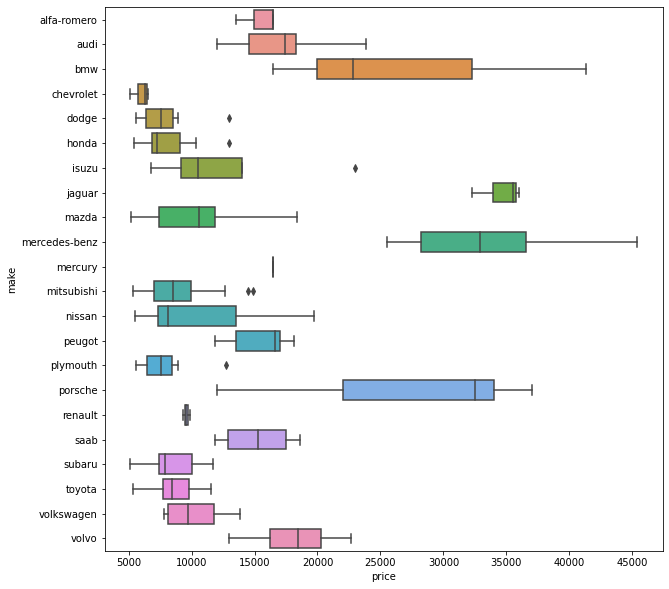

In [38]:
plt.figure(figsize=(10,10))
sns.boxplot(x="price",y='make',data=df)
plt.show()

In [39]:
df.loc[(df['make']=="dodge") & (df['price']>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,12964


In [40]:
df.drop(index=[29],inplace=True)

In [41]:
df.loc[(df['make']=="honda") & (df['price']>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101,24,28,12945


In [42]:
df.drop(index=[41],inplace=True)

In [43]:
df.loc[(df['make']=="isuzu") & (df['price']>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,?,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70,38,43,23000


In [44]:
df.drop(index=[45],inplace=True)

In [45]:
df.loc[(df['make']=="mitsubishi") & (df['price']>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,?,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,14869
84,3,?,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,14489


In [46]:
df.drop(index=[83,84],inplace=True)

In [47]:
df.loc[(df['make']=="plymouth") & (df['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,?,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145,19,24,12764


In [48]:
df.drop(index=[124],inplace=True)

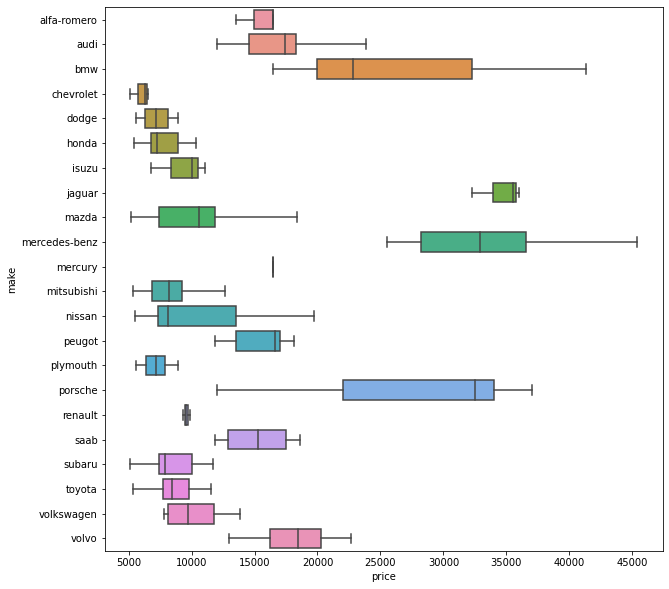

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(x="price",y='make',data=df)
plt.show()

# Handling Null Values

In [50]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [51]:
df.tail(20)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
185,2,94,volkswagen,gas,sedan,fwd,front,65.5,55.7,ohc,109,85,27,34,8195
186,2,94,volkswagen,gas,sedan,fwd,front,65.5,55.7,ohc,109,85,27,34,8495
187,2,94,volkswagen,diesel,sedan,fwd,front,65.5,55.7,ohc,97,68,37,42,9495
188,2,94,volkswagen,gas,sedan,fwd,front,65.5,55.7,ohc,109,100,26,32,9995
189,3,?,volkswagen,gas,convertible,fwd,front,64.2,55.6,ohc,109,90,24,29,11595
190,3,256,volkswagen,gas,hatchback,fwd,front,64.0,51.4,ohc,109,90,24,29,9980
191,0,?,volkswagen,gas,sedan,fwd,front,66.9,55.1,ohc,136,110,19,24,13295
192,0,?,volkswagen,diesel,sedan,fwd,front,66.9,55.1,ohc,97,68,33,38,13845
193,0,?,volkswagen,gas,wagon,fwd,front,66.9,55.1,ohc,109,88,25,31,12290
194,-2,103,volvo,gas,sedan,rwd,front,67.2,56.2,ohc,141,114,23,28,12940


# Handling Catogorical Columns

In [52]:
cat_col=df.select_dtypes(include=['object']).columns
cat_col

Index(['normalized-losses', 'make', 'fuel-type', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'horsepower'],
      dtype='object')

In [53]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '137', '101', '78', '106', '85', '107', '145', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '94',
       '256', '95'], dtype=object)

In [54]:
df['normalized-losses']=df['normalized-losses'].replace("?",np.nan)

In [55]:
df.isnull().sum()/len(df)*100

symboling             0.000000
normalized-losses    18.556701
make                  0.000000
fuel-type             0.000000
body-style            0.000000
drive-wheels          0.000000
engine-location       0.000000
width                 0.000000
height                0.000000
engine-type           0.000000
engine-size           0.000000
horsepower            0.000000
city-mpg              0.000000
highway-mpg           0.000000
price                 0.000000
dtype: float64

In [56]:
df['normalized-losses']=df['normalized-losses'].astype(float)

In [57]:
mean=df['normalized-losses'].mean()
median=df['normalized-losses'].median()

In [58]:
mean

121.26582278481013

In [59]:
median

115.0

In [60]:
df['normalized-losses']=df['normalized-losses'].fillna(mean)

In [61]:
 df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [62]:
 df['make'].isnull().sum()

0

In [63]:
 df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [64]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [65]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [66]:
df['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [67]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [68]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '145', '69', '55', '97', '152', '200', '95',
       '142', '143', '207', '288', '?', '73', '82', '94', '62', '56',
       '112', '92', '52', '85', '114', '162', '134', '106'], dtype=object)

In [69]:
df['horsepower']=df['horsepower'].replace("?",np.nan)

In [70]:
df['horsepower'].isnull().sum()

2

In [71]:
df.dropna(inplace=True)

In [72]:
df.reset_index(drop=True,inplace=True)

In [73]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,121.265823,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,121.265823,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,121.265823,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164.000000,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164.000000,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [74]:
df['horsepower']=df['horsepower'].astype("float")

In [75]:
#pip install sklearn

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
#le=LabelEncoder()

In [78]:
#df['fuel-type']=le.fit_transform(df['fuel-type'])

In [79]:
#df['fuel-type'].unique()

In [80]:
#df['make']=le.fit_transform(df['make'])

In [81]:
#df[ 'engine-location']=le.fit_transform(df[ 'engine-location'])

In [82]:
#df['body-style']=le.fit_transform(df['body-style'])

In [83]:
#df['drive-wheels']=le.fit_transform(df['drive-wheels'])

In [84]:
#df['engine-type']=le.fit_transform(df['engine-type'])

In [85]:
num_col=df.select_dtypes(include=['int','float']).columns
num_col

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

symboling
Skewness: 0.21851586158475478
Kurtosis -0.5207505994440842


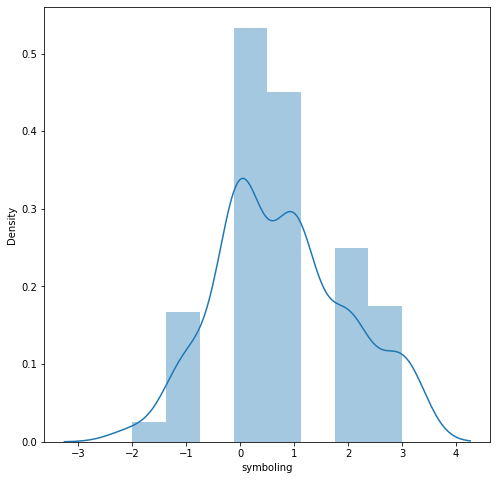

normalized-losses
Skewness: 0.863669054508272
Kurtosis 1.498802261215935


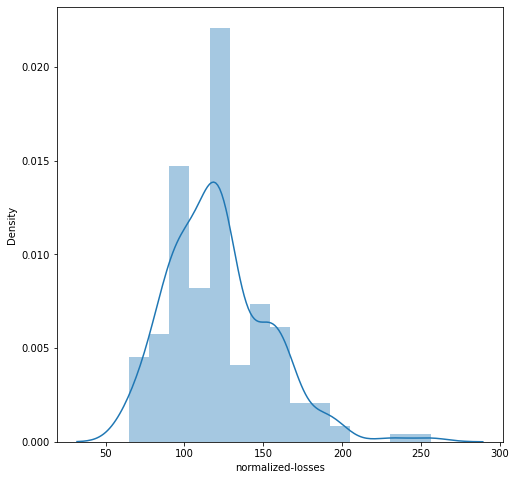

width
Skewness: 0.9269547452923791
Kurtosis 0.6061471796032518


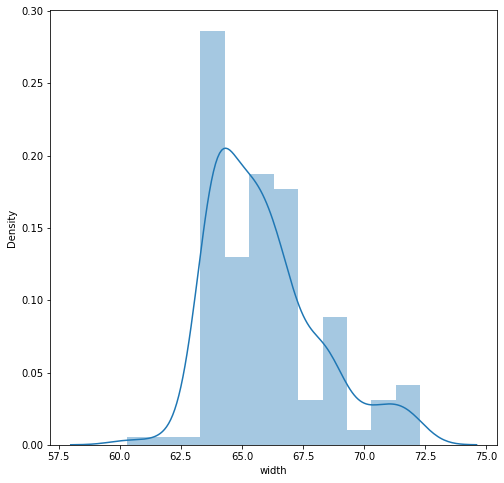

height
Skewness: 0.013862556993541048
Kurtosis -0.4086625260947234


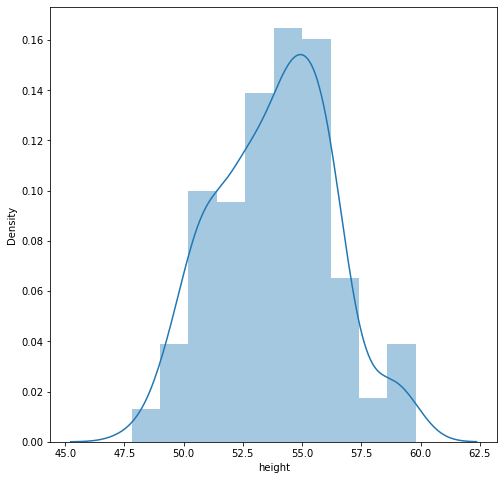

engine-size
Skewness: 2.0651048623321513
Kurtosis 5.617303378817887


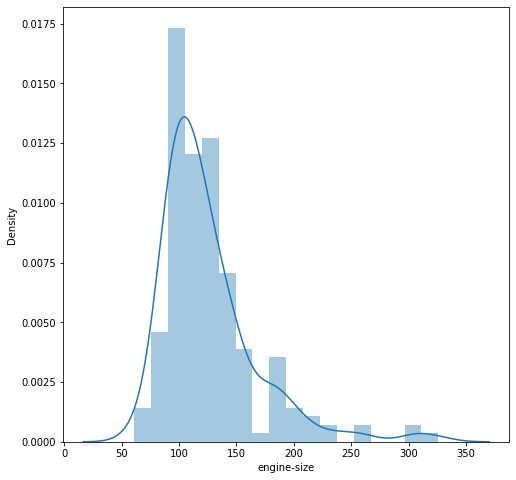

horsepower
Skewness: 1.5613416798557116
Kurtosis 3.260248699253126


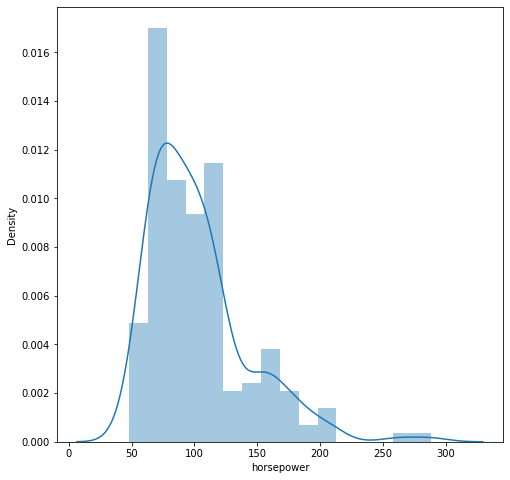

city-mpg
Skewness: 0.5917393415015813
Kurtosis 0.5565804473413296


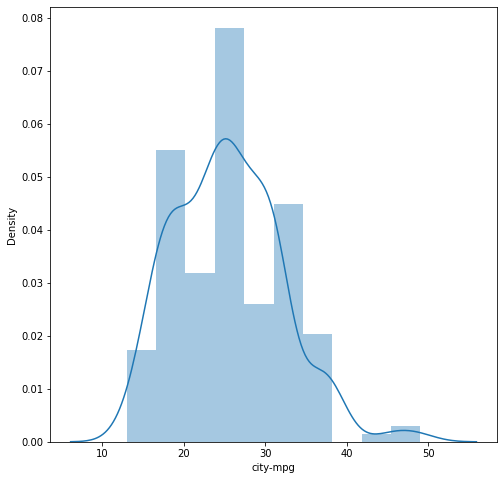

highway-mpg
Skewness: 0.4773786015943765
Kurtosis 0.4489140127127831


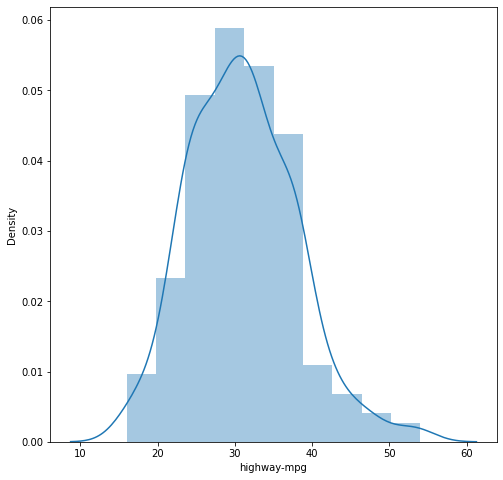

price
Skewness: 1.8142202558240432
Kurtosis 3.0975984635023734


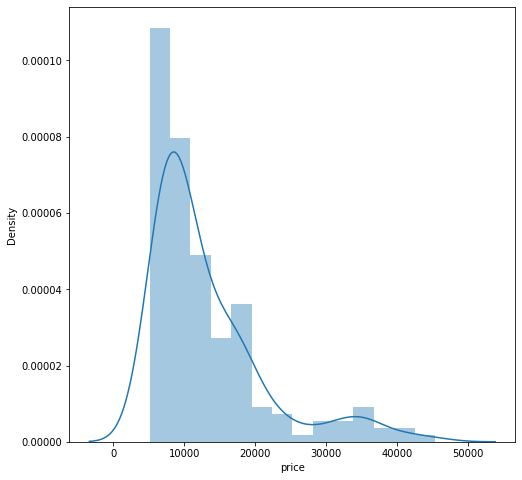

In [86]:
for col in num_col:
    print(col)
    print("Skewness:",df[col].skew())
    print("Kurtosis",df[col].kurt())
    plt.figure(figsize=(8,8))
    sns.distplot(df[col])
    plt.show()

In [87]:
corr=df.corr()

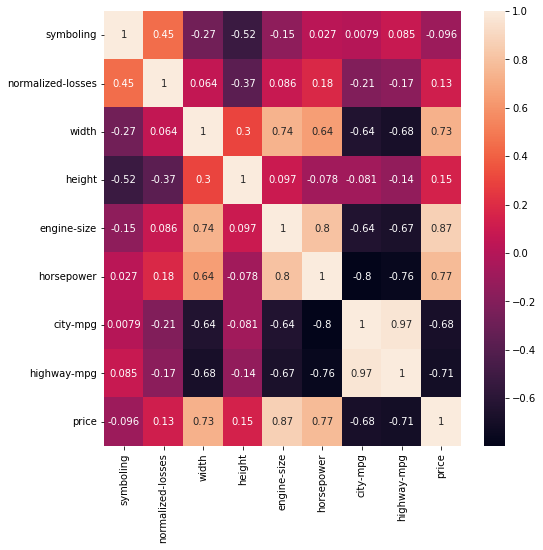

In [88]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)
plt.show()

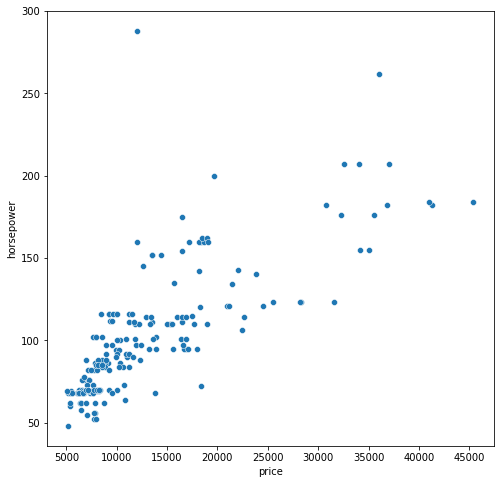

In [89]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='price',y='horsepower',data=df)
plt.show()

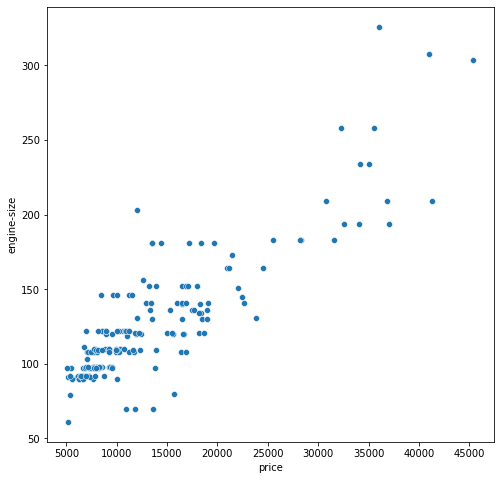

In [90]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='price',y='engine-size',data=df)
plt.show()

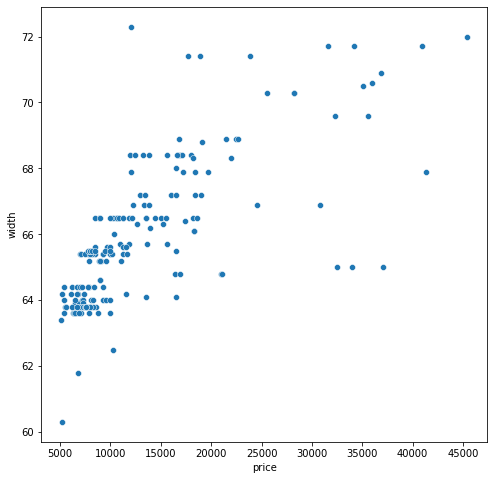

In [91]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='price',y='width',data=df)
plt.show()

# Handling Catogorical Columns

In [92]:
cat_col=df.select_dtypes(include=['O']).columns
cat_col

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [93]:
cat_col

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

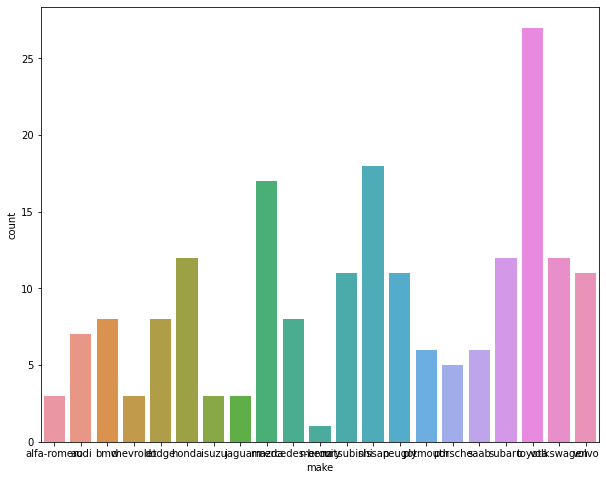

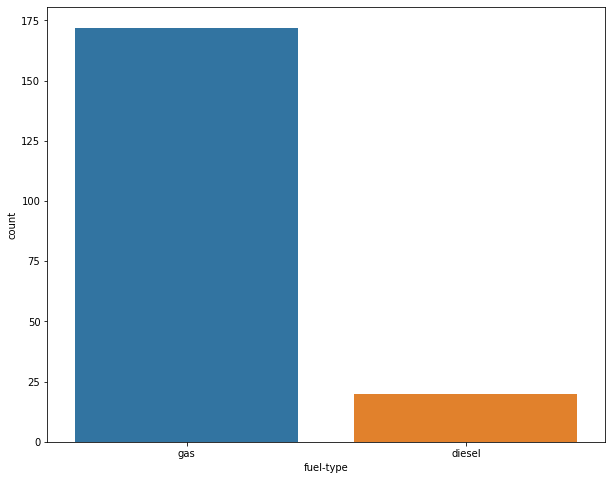

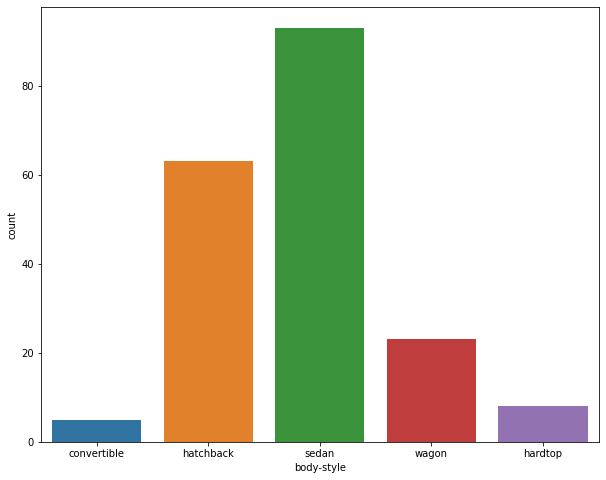

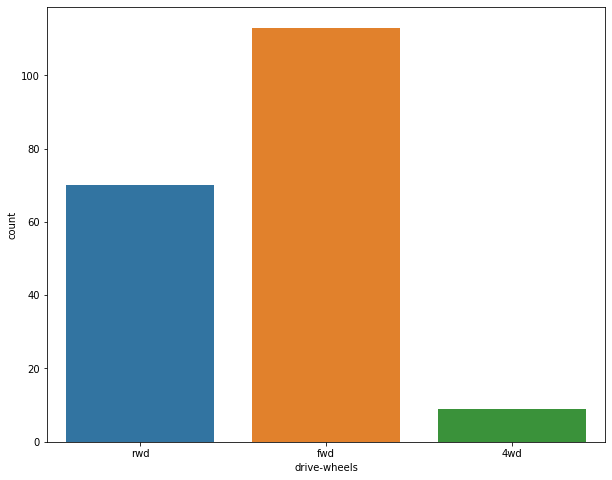

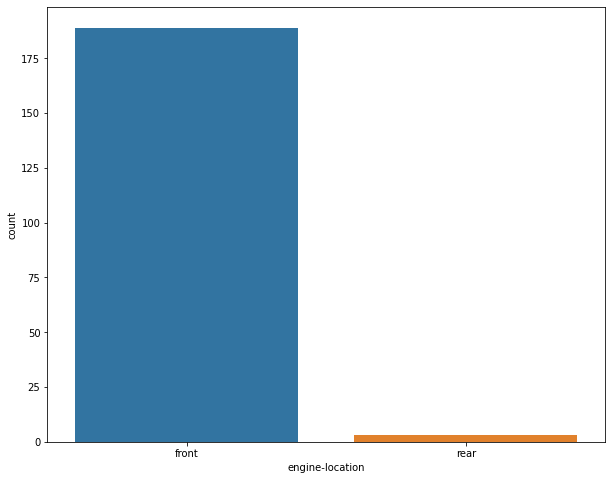

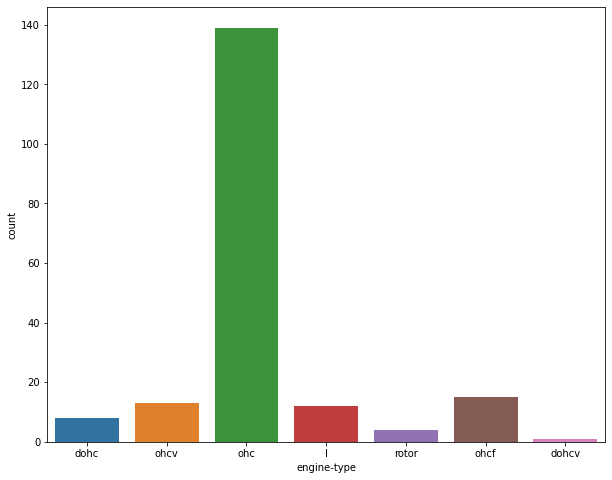

In [94]:
for i in cat_col:
    plt.figure(figsize=(10,8))
    sns.countplot(df[i])
    plt.show()

# Encoding

In [95]:
for col in cat_col:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [96]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,121.265823,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,13495
1,3,121.265823,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,16500
2,1,121.265823,0,1,2,2,0,65.5,52.4,5,152,154.0,19,26,16500
3,2,164.000000,1,1,3,1,0,66.2,54.3,3,109,102.0,24,30,13950
4,2,164.000000,1,1,3,0,0,66.4,54.3,3,136,115.0,18,22,17450


In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
se=StandardScaler()

In [99]:
se.fit_transform(df[['normalized-losses']])

array([[-4.51329187e-16],
       [-4.51329187e-16],
       [-4.51329187e-16],
       [ 1.35721474e+00],
       [ 1.35721474e+00],
       [-4.51329187e-16],
       [ 1.16665793e+00],
       [-4.51329187e-16],
       [ 1.16665793e+00],
       [-4.51329187e-16],
       [ 2.24647985e+00],
       [ 2.24647985e+00],
       [ 2.11944197e+00],
       [ 2.11944197e+00],
       [-4.51329187e-16],
       [-4.51329187e-16],
       [-4.51329187e-16],
       [-4.51329187e-16],
       [-8.44239026e-03],
       [-7.38910157e-01],
       [-1.27882112e+00],
       [-1.03720795e-01],
       [-1.03720795e-01],
       [-1.03720795e-01],
       [ 8.49063249e-01],
       [ 8.49063249e-01],
       [ 8.49063249e-01],
       [ 8.49063249e-01],
       [-3.57796540e-01],
       [ 4.99709100e-01],
       [ 4.99709100e-01],
       [-6.43631753e-01],
       [-6.43631753e-01],
       [-6.43631753e-01],
       [-3.57796540e-01],
       [-1.37409952e+00],
       [-4.84834412e-01],
       [-4.84834412e-01],
       [-1.1

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
min_max=MinMaxScaler()

In [102]:
min_max.fit_transform(df[['normalized-losses']])

array([[0.29458546],
       [0.29458546],
       [0.29458546],
       [0.51832461],
       [0.51832461],
       [0.29458546],
       [0.48691099],
       [0.29458546],
       [0.48691099],
       [0.29458546],
       [0.66492147],
       [0.66492147],
       [0.64397906],
       [0.64397906],
       [0.29458546],
       [0.29458546],
       [0.29458546],
       [0.29458546],
       [0.29319372],
       [0.17277487],
       [0.08376963],
       [0.27748691],
       [0.27748691],
       [0.27748691],
       [0.43455497],
       [0.43455497],
       [0.43455497],
       [0.43455497],
       [0.23560209],
       [0.37696335],
       [0.37696335],
       [0.18848168],
       [0.18848168],
       [0.18848168],
       [0.23560209],
       [0.06806283],
       [0.21465969],
       [0.21465969],
       [0.10471204],
       [0.10471204],
       [0.21989529],
       [0.29458546],
       [0.29458546],
       [0.29458546],
       [0.41884817],
       [0.29458546],
       [0.29458546],
       [0.204

In [103]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,121.265823,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,13495
1,3,121.265823,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,16500
2,1,121.265823,0,1,2,2,0,65.5,52.4,5,152,154.0,19,26,16500
3,2,164.000000,1,1,3,1,0,66.2,54.3,3,109,102.0,24,30,13950
4,2,164.000000,1,1,3,0,0,66.4,54.3,3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,-1,95.000000,20,1,3,2,0,68.9,55.5,3,141,114.0,23,28,16845
188,-1,95.000000,20,1,3,2,0,68.8,55.5,3,141,160.0,19,25,19045
189,-1,95.000000,20,1,3,2,0,68.9,55.5,5,173,134.0,18,23,21485
190,-1,95.000000,20,0,3,2,0,68.9,55.5,3,145,106.0,26,27,22470


In [104]:
#independent Variable
X=df.iloc[:,:-1]

In [105]:
y=df.iloc[:,-1]

# Train test split

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
#Spliting dataset into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [108]:
X_train.shape

(153, 14)

In [109]:
y_train.shape

(153,)

In [110]:
X_test.shape

(39, 14)

In [111]:
y_test.shape

(39,)

# Model Building

In [112]:
#import model
from sklearn.linear_model import LinearRegression

In [113]:
#initialize Model
reg=LinearRegression()

In [114]:
#Fitting the model or taining the model
reg.fit(X_train,y_train)

LinearRegression()

In [115]:
#Make Predictions
y_train_pred=reg.predict(X_train)

In [116]:
y_test_pred=reg.predict(X_test)

In [117]:
y_train_pred

array([ 8597.21487736, 14568.51333615,  9715.45864011,  7504.26221317,
        6282.64052286, 14416.53336569, 17202.12803674, 16081.03230036,
       13621.21126364,  6217.28323046, 17028.92115387, 21187.67170771,
       21132.52508125, 17201.92952822, 10476.13585946, 10837.54247762,
        6499.4743348 ,  9820.81327468, 15794.67548152,  7554.81816689,
       34532.23667752, 10742.65580509, 10729.99611934,  6360.90952459,
        9209.10670992, 13523.75025899, 18988.78120947, 19093.91492818,
        9806.56646852, 16446.16690691,  7094.7199377 ,  6597.84548926,
       11633.29038085, 20188.93997253,  6849.19064737,  5730.62640742,
       12255.10365053,  4101.31016601,  9766.01928621, 15855.4641562 ,
       34519.52664495, 31632.69491908,  5520.25498517, 11319.62783012,
       12727.67346293,  9315.90054508, 37526.28008622,  4523.33085432,
       16431.37179901, 26487.17692268, 14568.51333615, 26229.76053756,
        5865.92234639, 12714.96343036, 16811.46473595, 11018.75369979,
      

In [118]:
y_test_pred

array([ 8711.13754449,  6512.18436737, 11745.48677776, 15116.35226474,
        5956.09471983,  5225.62694179, 16841.35055789,  4917.92305569,
       10837.54247762,  6772.63360837,  6490.08820267, 14555.80330358,
        4877.23638886,  5804.50948728, 14825.31926004,  5580.61640462,
       17891.31477755,  9592.1274078 ,  8461.01547337,  9278.56706981,
        4954.46148442,  5170.54701603,  5844.54907454,  5866.78415506,
       10193.51230047, 10491.6888381 ,  8553.66858021, 12255.10365053,
       17679.81017829,  6437.73874822,  8448.30544079, 10729.99611934,
       38577.37251244,  6633.44483362,  8679.99011416,  8565.4319183 ,
        9110.88150422,  7033.61946326,  9793.85643594])

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
reg.intercept_

-47134.28340213747

In [121]:
reg.coef_

array([ 2.11056044e+02, -4.06866668e+00, -2.01209290e+02, -8.69746666e+02,
        1.27100326e+01,  2.41775469e+03,  1.46829881e+04,  6.54205129e+02,
        2.38256934e+02, -3.33147265e+00,  8.82876000e+01,  6.83390621e-01,
        1.72184988e+02, -3.64681827e+02])

In [122]:
from sklearn.metrics import r2_score

In [123]:
train=r2_score(y_train,y_train_pred)

In [124]:
test=r2_score(y_test,y_test_pred)

In [125]:
train

0.8575524664746854

In [126]:
test

0.8738784155136033

In [127]:
from sklearn.model_selection import KFold,cross_val_score

In [168]:
cv=KFold(n_splits=5,shuffle=True,random_state=1)

In [169]:
score=cross_val_score(reg,X,y,scoring="r2",cv=cv,n_jobs=-1)

In [170]:
score

array([0.83114443, 0.40585371, 0.93213398, 0.77855992, 0.87706923])

In [171]:
np.mean(score)

0.7649522527354928

In [157]:
from sklearn.metrics import r2_score,mean_squared_error

In [158]:
def metric(y_actual,y_pred):
    r2=r2_score(y_actual,y_pred)
    RMSE=np.sqrt(mean_squared_error(y_actual,y_pred))
    print("R2 Score: {} | RMSE: {}".format(round(r2,2),round(RMSE,2)))

In [159]:
print("Training Performance")
metric(y_train,y_train_pred)
print("Testing Performance")
metric(y_test,y_test_pred)

Training Performance
R2 Score: 0.86 | RMSE: 3126.71
Testing Performance
R2 Score: 0.87 | RMSE: 2357.06
